In [ ]:
# install pydrive to load data
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id = "1eispPCMAQvWMcOF6M17LSoo06cMsnBUS"
file = drive.CreateFile({'id':id}) 
file.GetContentFile('bank_churn.csv') 

In [ ]:
import pandas as pd

churn_df = pd.read_csv('bank_churn.csv')
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
churn_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
y = churn_df['Exited']

In [ ]:
print(y.sum()/y.shape*100)

[20.37]


In [ ]:
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


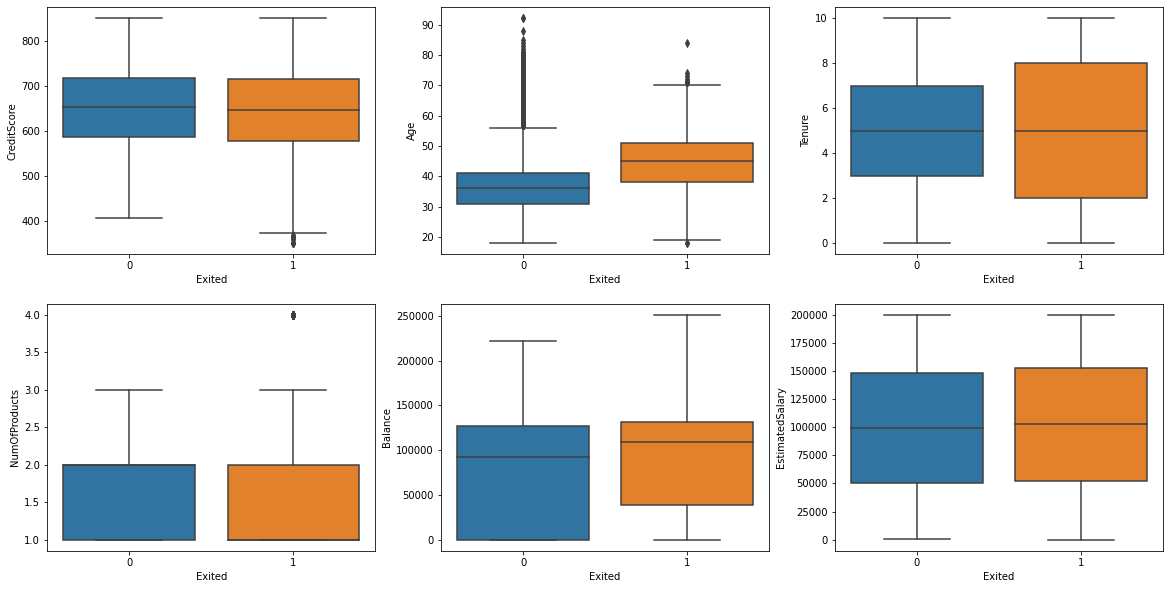

In [ ]:
_,axss = plt.subplots(2,3,figsize=[20,10])
sns.boxplot(x='Exited', y='CreditScore', data=churn_df, ax=axss[0][0])
sns.boxplot(x='Exited', y ='Age', data=churn_df, ax=axss[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=churn_df, ax=axss[0][2])
sns.boxplot(x='Exited', y ='NumOfProducts', data=churn_df, ax=axss[1][0])
sns.boxplot(x='Exited', y ='Balance', data=churn_df, ax=axss[1][1])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=churn_df, ax=axss[1][2])

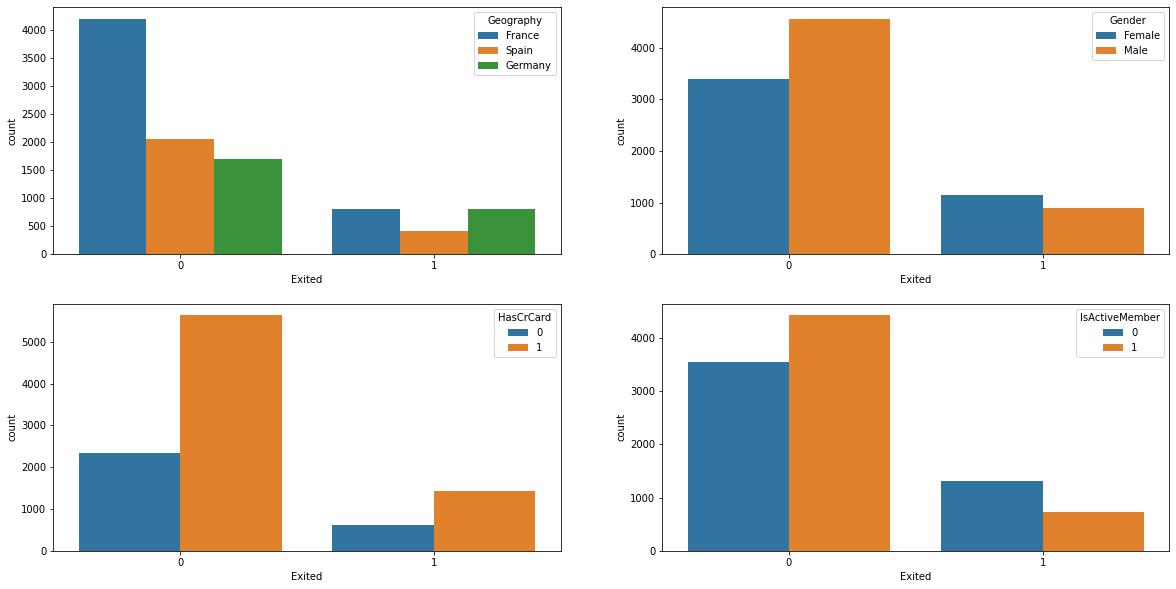

In [ ]:
# understand categorical feature
# 'Geography', 'Gender'
# 'HasCrCard', 'IsActiveMember'
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Exited', hue='Geography',data=churn_df, ax=axss[0][0])
sns.countplot(x='Exited',hue='Gender', data=churn_df, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=churn_df, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=churn_df, ax=axss[1][1])

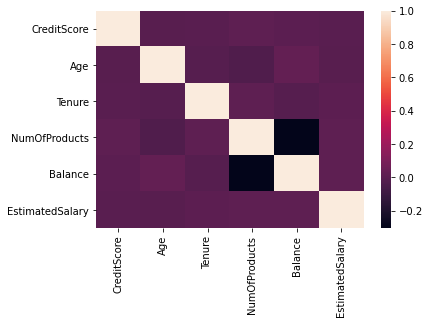

In [ ]:
corr_score=churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].corr()
sns.heatmap(churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].corr())

In [ ]:
corr_score

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.012238,0.006268,-0.001384
Age,-0.003965,1.000000,-0.009997,-0.030680,0.028308,-0.007201
Tenure,0.000842,-0.009997,1.000000,0.013444,-0.012254,0.007784
NumOfProducts,0.012238,-0.030680,0.013444,1.000000,-0.304180,0.014204
Balance,0.006268,0.028308,-0.012254,-0.304180,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.007784,0.014204,0.012797,1.000000


In [ ]:
churn_df['Gender'] = churn_df['Gender'] =='Female'

In [ ]:
churn_df = pd.get_dummies(churn_df, columns=['Geography'])

In [ ]:
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,True,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,True,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,True,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,True,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,True,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
to_drop = ['RowNumber','CustomerId','Surname','Exited']
X = churn_df.drop(to_drop, axis=1)

In [ ]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,True,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,True,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,True,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,True,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,True,43,2,125510.82,1,1,1,79084.10,0,0,1


In [ ]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = 0.25, stratify = y, random_state=1)
print('training data has '+str(X_train.shape[0])+' observation with '+str(X_train.shape[1]) + ' features')
print('test data has '+str(X_test.shape[0])+' observation with '+str(X_test.shape[1]) + ' features')

training data has 7500 observation with 12 features
test data has 2500 observation with 12 features


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.17298471, -0.91333963,  0.28920217, ..., -0.99973337,
        -0.57755555,  1.73205081],
       [ 0.60240695,  1.09488296, -1.50931877, ..., -0.99973337,
         1.73143519, -0.57735027],
       [-1.05176192,  1.09488296, -0.18409282, ...,  1.0002667 ,
        -0.57755555, -0.57735027],
       ...,
       [-0.49347993, -0.91333963, -0.46806981, ..., -0.99973337,
        -0.57755555,  1.73205081],
       [ 2.07048181, -0.91333963,  0.09988417, ...,  1.0002667 ,
        -0.57755555, -0.57735027],
       [ 0.78850094, -0.91333963, -1.03602379, ...,  1.0002667 ,
        -0.57755555, -0.57735027]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

classifier_logistic = LogisticRegression()
classifier_KNN = KNeighborsClassifier()
classifier_RF = RandomForestClassifier()

In [ ]:
classifier_logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
classifier_logistic.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
classifier_logistic.score(X_test, y_test)

0.808

In [ ]:
model_names = ['Logistic Regression', 'KNN', 'Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
  cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
  print(cv_score)
  print('Model accuracy of ' + model_names[count] + ' is ' +str(cv_score.mean()))
  count += 1

[0.81933333 0.80666667 0.80666667 0.80933333 0.82      ]
Model accuracy of Logistic Regression is 0.8124
[0.82533333 0.836      0.814      0.824      0.832     ]
Model accuracy of KNN is 0.8262666666666666
[0.882      0.86533333 0.858      0.85933333 0.86333333]
Model accuracy of Random Forest is 0.8655999999999999


In [ ]:
from sklearn.model_selection import GridSearchCV

def print_grid_search_metrics(gs):
  print('Best score: ' + str(gs.best_score_))
  print('Best parameters set:')
  best_parameters = gs.best_params_
  for param_name in sorted(best_parameters.keys()):
    print(param_name+':'+str(best_parameters[param_name]))

In [ ]:
parameters={
    'penalty':('l1','l2'),
    'C':(0.01, 1,5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.01, 1, 5, 10), 'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print_grid_search_metrics(Grid_LR)

Best score: 0.8124
Best parameters set:
C:1
penalty:l2


In [ ]:
best_LR_model = Grid_LR.best_estimator_

In [ ]:
parameters = {
    'n_neighbors':[1,3,5,7,9]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print_grid_search_metrics(Grid_KNN)
best_KNN_model = Grid_KNN.best_estimator_

Best score: 0.8322666666666667
Best parameters set:
n_neighbors:9


In [ ]:
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(), parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
print_grid_search_metrics(Grid_RF)
best_RF_model = Grid_RF.best_estimator_

Best score: 0.8637333333333335
Best parameters set:
n_estimators:60


In [ ]:
best_RF_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def cal_evaluation(classifier, cm):
  tn = cm[0][0]
  fp = cm[0][1]
  fn = cm[1][0]
  tp = cm[1][1]
  accuracy = (tp+tn)/(tp+fp+fn+tn+0.0)
  precision = tp/(tp+fp+0.0)
  recall = tp/(tp+fn+0.0)

  print(classifier)
  print('Accuracy is: ' + str(accuracy))
  print('precision is: ' + str(precision))
  # print('recall is: ') + str(recall)
  print()

def draw_confusion_matrices(confusion_matricies):
  class_names = ['Not', 'Churn']
  for cm in confusion_matrices:
    classifier, cm = cm[0], cm[1]
    cal_evaluation(classifier, cm)
    print (cm)

In [ ]:
confusion_matrices = [
    ('Random Forest', confusion_matrix(y_test, best_RF_model.predict(X_test))),
    ('Logistics Regression', confusion_matrix(y_test, best_LR_model.predict(X_test))),
    ('K nearest neighbor', confusion_matrix(y_test, best_KNN_model.predict(X_test))),
]
draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is: 0.8576
precision is: 0.7741935483870968

[[1928   63]
 [ 293  216]]
Logistics Regression
Accuracy is: 0.808
precision is: 0.5857988165680473

[[1921   70]
 [ 410   99]]
K nearest neighbor
Accuracy is: 0.8336
precision is: 0.6837944664031621

[[1911   80]
 [ 336  173]]


In [ ]:
from sklearn.metrics import roc_curve
from sklearn import metrics

y_pred_rf = best_RF_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresh = roc_curve(y_test, y_pred_rf)

best_RF_model.predict_proba(X_test)

array([[0.8       , 0.2       ],
       [0.93333333, 0.06666667],
       [0.76666667, 0.23333333],
       ...,
       [0.95      , 0.05      ],
       [0.9       , 0.1       ],
       [0.91666667, 0.08333333]])

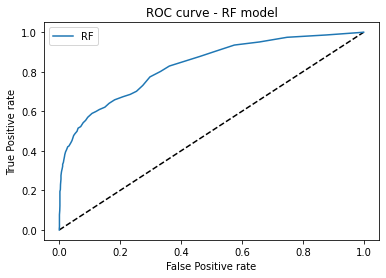

In [ ]:
plt.figure(1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc = 'best')
plt.show()

In [ ]:
metrics.auc(fpr_rf, tpr_rf)

0.8300199621282016

In [ ]:
y_pred_lr = best_LR_model.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_pred_lr)

best_LR_model.predict_proba(X_test)
# print(fpr_lr, tpr_lr)

[0.         0.         0.00200904 0.00200904 0.0025113  0.0025113
 0.00301356 0.00301356 0.00351582 0.00351582 0.00401808 0.00401808
 0.0050226  0.0050226  0.00552486 0.00552486 0.00602712 0.00602712
 0.00652938 0.00652938 0.0075339  0.0075339  0.00803616 0.00803616
 0.00853842 0.00853842 0.00904068 0.00904068 0.00954294 0.00954294
 0.01054746 0.01054746 0.01205424 0.01205424 0.01305876 0.01305876
 0.01356102 0.01356102 0.01406328 0.01406328 0.01456554 0.01456554
 0.01506781 0.01506781 0.01557007 0.01557007 0.01757911 0.01757911
 0.01858363 0.01858363 0.01908589 0.01908589 0.01958815 0.01958815
 0.02310397 0.02310397 0.02561527 0.02561527 0.02712205 0.02712205
 0.02762431 0.02762431 0.02812657 0.02812657 0.02913109 0.02913109
 0.02963335 0.02963335 0.03164239 0.03164239 0.03365143 0.03365143
 0.03616273 0.03616273 0.03817177 0.03817177 0.03967855 0.03967855
 0.04068307 0.04068307 0.04218985 0.04218985 0.04269211 0.04269211
 0.04369663 0.04369663 0.0441989  0.0441989  0.0467102  0.04671

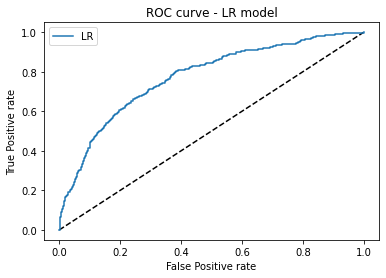

In [ ]:
plt.figure(1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC curve - LR model')
plt.legend(loc = 'best')
plt.show()

In [ ]:
metrics.auc(fpr_lr, tpr_lr)

0.7722314264879581

In [ ]:
X_with_corr = X.copy()
# X_with_corr['salaryinRMB'] = X['EstimatedSalary']*6.91
X_with_corr.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,True,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,True,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,True,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,True,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,True,43,2,125510.82,1,1,1,79084.10,0,0,1


In [ ]:
scaler = StandardScaler()
X_l1 = scaler.fit_transform(X_with_corr)
LRmodel_l1 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
LRmodel_l1.fit(X_l1, y)

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

print('Logistics Regression (L1) Coefficients')
print(X_with_corr.shape)
for ind in range(X_with_corr.shape[1]):
  print("{0}:{1}".format(X_with_corr.columns[indices[ind]], round(LRmodel_l1.coef_[0][indices[ind]], 4)))

Logistics Regression (L1) Coefficients
(10000, 12)
Age:0.7495
IsActiveMember:-0.524
Geography_Germany:0.3171
Gender:0.2541
Balance:0.159
CreditScore:-0.0569
NumOfProducts:-0.0529
Tenure:-0.0384
EstimatedSalary:0.0202
HasCrCard:-0.013
Geography_France:-0.0122
Geography_Spain:0.0


In [ ]:
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X_with_corr)
LRmodel_l2 = LogisticRegression(penalty='l2', C=0.1, solver='liblinear')
LRmodel_l2.fit(X_l2, y)

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print('Logistics Regression (L2) Coefficients')
for ind in range(X_with_corr.shape[1]):
  print("{0}:{1}".format(X_with_corr.columns[indices[ind]], round(LRmodel_l2.coef_[0][indices[ind]], 4)))

Logistics Regression (L2) Coefficients
Age:0.751
IsActiveMember:-0.5272
Gender:0.2591
Geography_Germany:0.2279
Balance:0.162
Geography_France:-0.1207
Geography_Spain:-0.089
CreditScore:-0.0637
NumOfProducts:-0.0586
Tenure:-0.0452
EstimatedSalary:0.0272
HasCrCard:-0.0199


In [ ]:
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

print('Feature importance ranking by Random Forest Model:')
for ind in range(X_with_corr.shape[1]):
  print("{0}:{1}".format(X_with_corr.columns[indices[ind]], round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Age:0.2381
EstimatedSalary:0.1463
CreditScore:0.1449
Balance:0.1414
NumOfProducts:0.1291
Tenure:0.0809
IsActiveMember:0.0417
Geography_Germany:0.022
Gender:0.0186
HasCrCard:0.0179
Geography_France:0.0101
Geography_Spain:0.009
